<a href="https://colab.research.google.com/github/chandutr/Natural-Language-Toolkit-Projects/blob/main/plant_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = r"/content/drive/MyDrive/Colab Notebooks/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  # Check if the item is a directory
  if os.path.isdir(f"{dir}/{directory}"):
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
      image_path = f"{dir}/{directory}/{files}"
      image_list.append(convert_image_to_array(image_path))
      label_list.append(binary_labels[temp])

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

,count
0,
0,300
1,300
2,300


In [ ]:
#Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [ ]:
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Training the model
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3668 - loss: 1.0760
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5106 - loss: 1.0157
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6518 - loss: 0.9537
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6456 - loss: 0.8923
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6543 - loss: 0.8428
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6593 - loss: 0.7967
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6601 - loss: 0.7500
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6502 - loss: 0.7304
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6695 - loss: 0.6745
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6721 - loss: 0.6396


In [ ]:
model.save(r"/content/drive/MyDrive/Colab Notebooks/Plant_images/plant_disease_model.h5")

In [ ]:
scores = model.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6781 - loss: 0.6048


In [ ]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


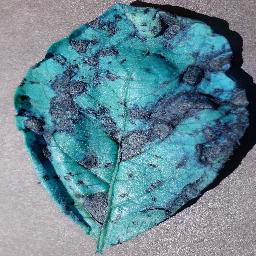

In [ ]:
img = array_to_img(x_test[10])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.168.143.9


In [ ]:
!pkill streamlit

In [ ]:
!streamlit run "/content/drive/MyDrive/Colab Notebooks/Plant_images/main.py" & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.143.9:8501

⠦⠧⠇⠏⠋⠙⠹your url is: https://five-carpets-travel.loca.lt
  Stopping...
^C
